<h1 align="center"> HR Analysis, Prediction and Visualization </b> </h1><br>

# Breakdown of this notebook:
1) **Importing the Libraries**

2) **Loading the dataset**

3) **Understanding the Attrition Problem and the Dataset**

4) **Data Visualization:**   
   - Plot a correlation map for all numeric variables
   - Overtime
   - Marital Status
   - Job Role
   - Gender
   - Education Field
   - Department
   - Buisness Travel
   - Relation between Overtime and Age
   - Total Working Years
   - Education Level
   - Number of Companies Worked
   - Distance from Home

5) **Prediction of Attrition**: LGBM Classifier

# Understanding the Attrition Problem and the Dataset

HR Analytics helps us with interpreting organizational data. It finds out the people-related trends in the data and helps the HR Department take the appropriate steps to keep the organization running smoothly and profitably.Attrition is a corporate setup is one of the complex challenges that the people managers and the HRs personnel have to deal with.

Interestingly, machine learning models can be deployed to predict potential attrition cases, thereby helping the appropriate HR Personnel take the necessary steps to retain the employee.


# Importing Essentials

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./employee-attrition.csv')
df.shape

(1470, 35)

In [3]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1241,32,No,Travel_Rarely,371,Sales,19,3,Life Sciences,1,1739,4,Male,80,1,3,Sales Executive,3,Married,9610,3840,3,Y,No,13,3,3,80,1,10,2,1,4,3,0,2
518,38,No,Travel_Rarely,243,Sales,7,4,Marketing,1,709,4,Female,46,2,2,Sales Executive,4,Single,4028,7791,0,Y,No,20,4,1,80,0,8,2,3,7,7,0,5
52,44,No,Travel_Rarely,1488,Sales,1,5,Marketing,1,68,2,Female,75,3,2,Sales Executive,1,Divorced,5454,4009,5,Y,Yes,21,4,3,80,1,9,2,2,4,3,1,3
622,32,No,Travel_Rarely,117,Sales,13,4,Life Sciences,1,859,2,Male,73,3,2,Sales Executive,4,Divorced,4403,9250,2,Y,No,11,3,3,80,1,8,3,2,5,2,0,3
55,33,No,Travel_Frequently,515,Research & Development,1,2,Life Sciences,1,73,1,Female,98,3,3,Research Director,4,Single,13458,15146,1,Y,Yes,12,3,3,80,0,15,1,3,15,14,8,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


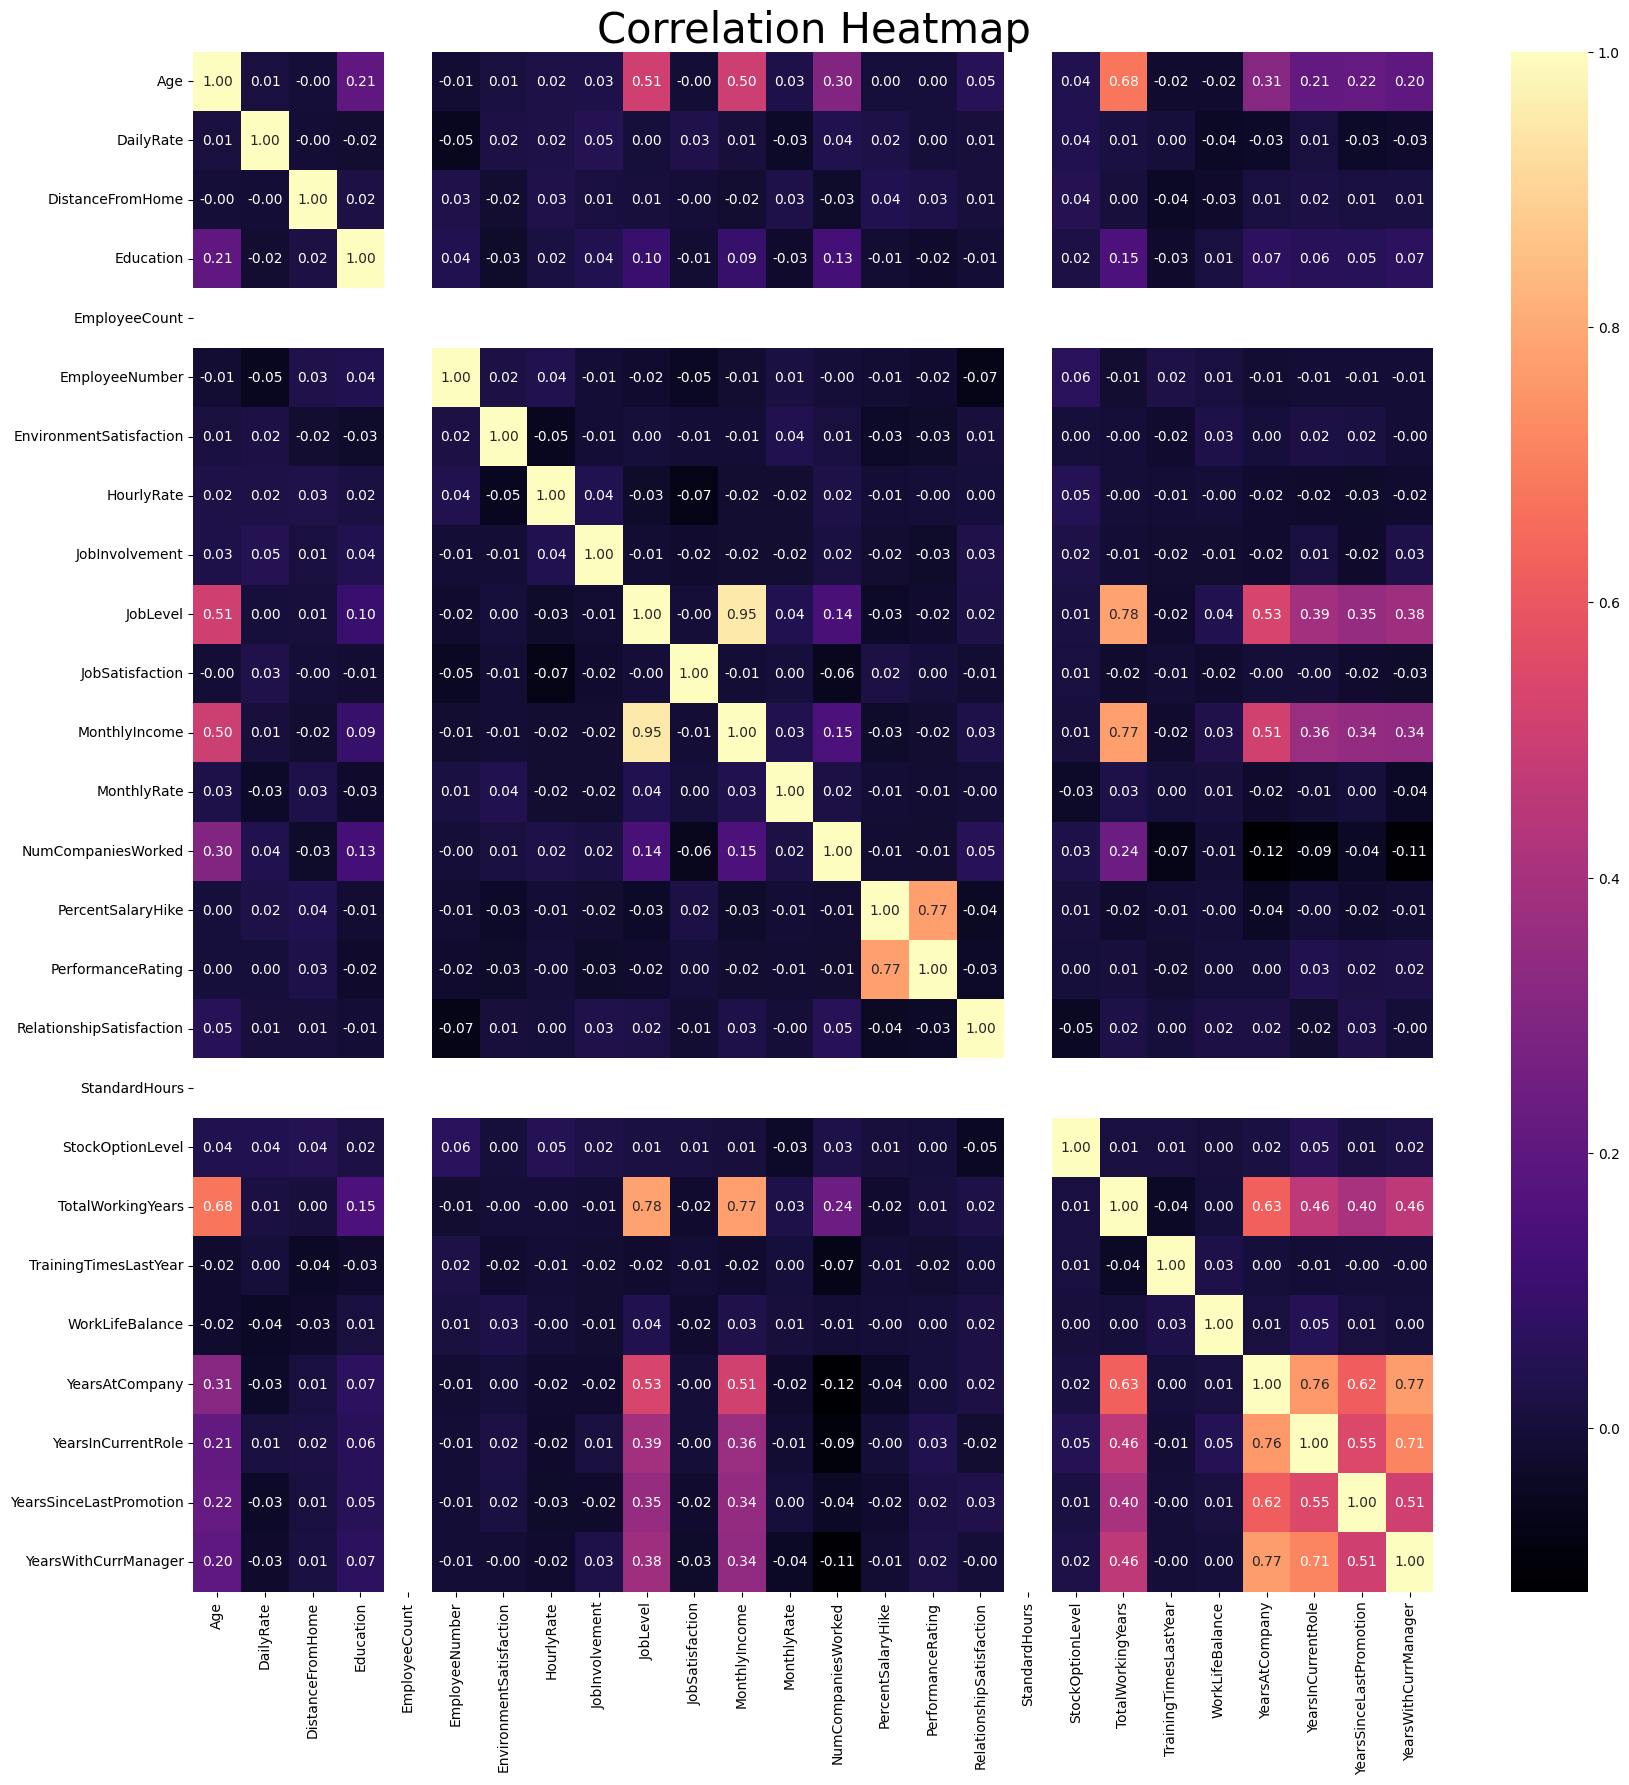

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='magma')
plt.title('Correlation Heatmap', fontsize=30)
plt.show()

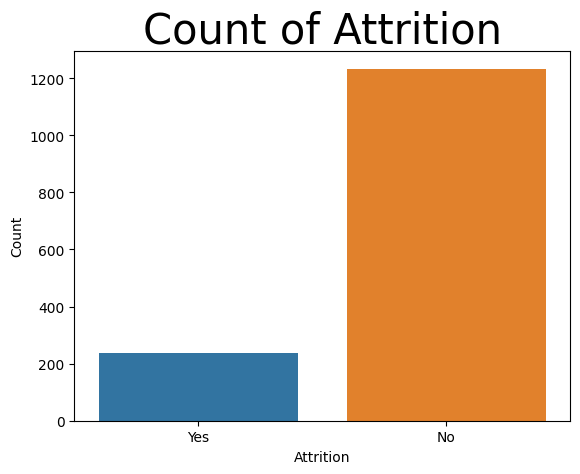

In [42]:
sns.countplot(x='Attrition', data=df)
plt.title('Count of Attrition', fontsize=30)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [7]:
categorical_cols = [feature for feature in df.columns if df[feature].dtypes=='object']
df[categorical_cols].sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
535,No,Travel_Rarely,Human Resources,Human Resources,Male,Manager,Divorced,Y,No
236,Yes,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Married,Y,No
1285,No,Non-Travel,Sales,Life Sciences,Male,Sales Executive,Single,Y,No
1058,Yes,Travel_Rarely,Sales,Medical,Female,Sales Executive,Single,Y,Yes
1334,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,No


In [8]:
numerical_cols = [feature for feature in df.columns if df[feature].dtypes!='object']
df[numerical_cols].sample(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
596,35,1258,1,4,1,826,4,40,4,1,3,2506,13301,3,13,3,3,80,0,7,0,3,2,2,2,2
908,33,536,10,5,1,1268,4,82,4,3,3,8380,21708,0,14,3,4,80,2,10,3,3,9,8,0,8
338,30,570,5,3,1,456,4,30,2,2,3,6118,5431,1,13,3,3,80,3,10,2,3,10,9,1,2
1313,29,350,13,3,1,1844,1,56,2,1,1,2335,3157,4,15,3,4,80,3,4,3,3,2,2,2,0
316,49,1091,1,2,1,431,3,90,2,4,3,13964,17810,7,12,3,4,80,0,25,2,3,7,1,0,7


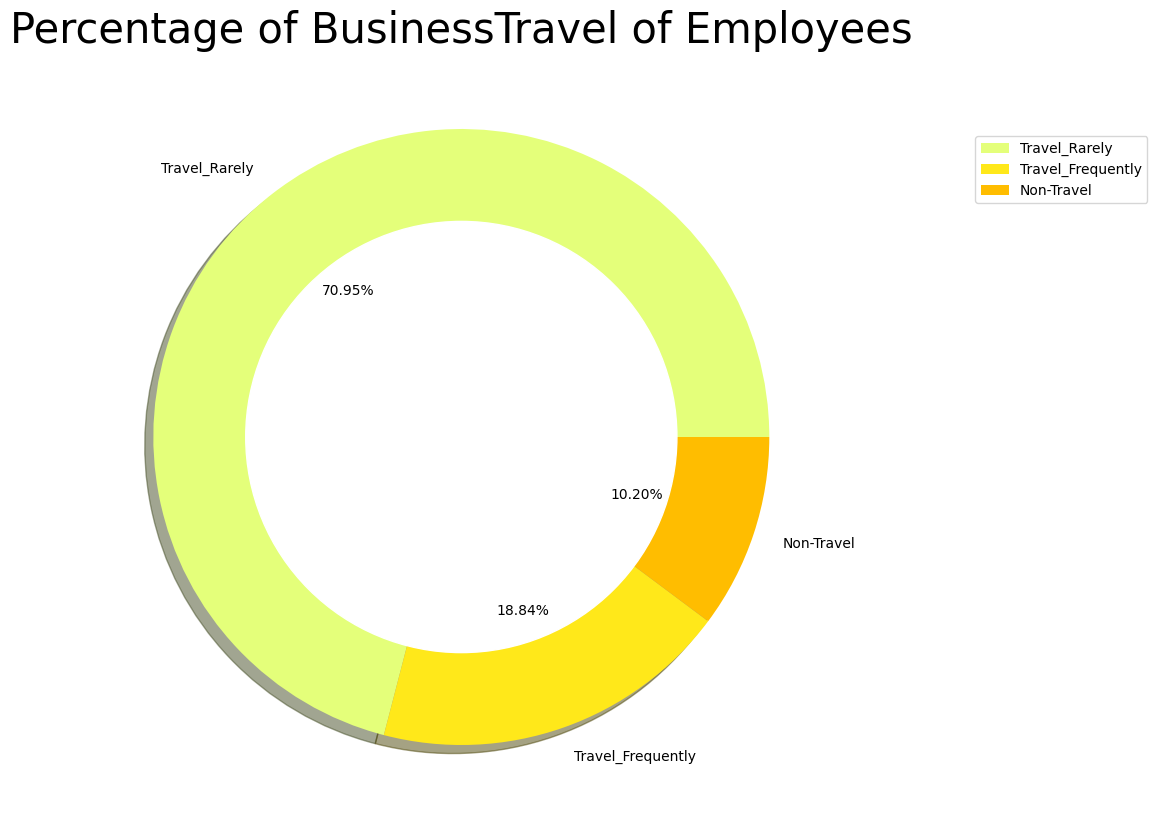

In [10]:
size = df['BusinessTravel'].value_counts()
labels = df['BusinessTravel'].unique()
colors = plt.cm.Wistia(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of BusinessTravel of Employees', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

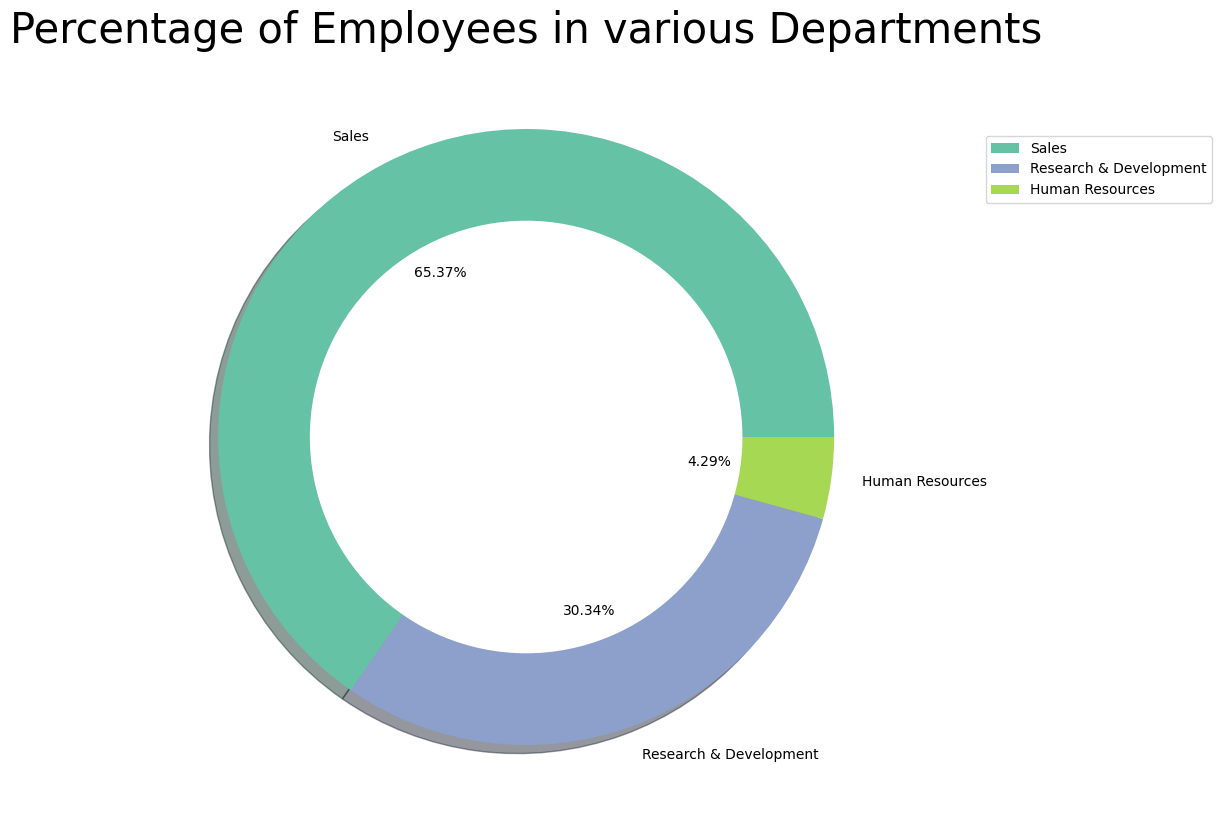

In [11]:
size = df['Department'].value_counts()
labels = df['Department'].unique()
colors = plt.cm.Set2(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Employees in various Departments', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

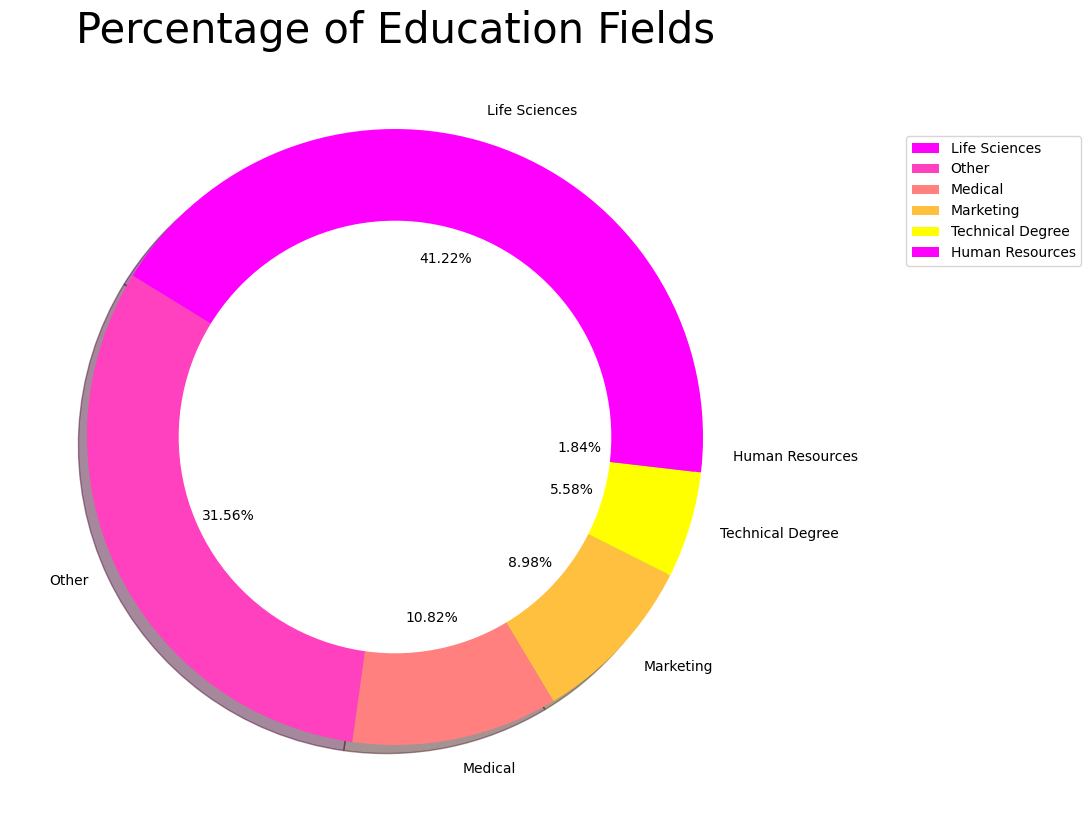

In [12]:
size = df['EducationField'].value_counts()
labels = df['EducationField'].unique()
colors = plt.cm.spring(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Education Fields', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

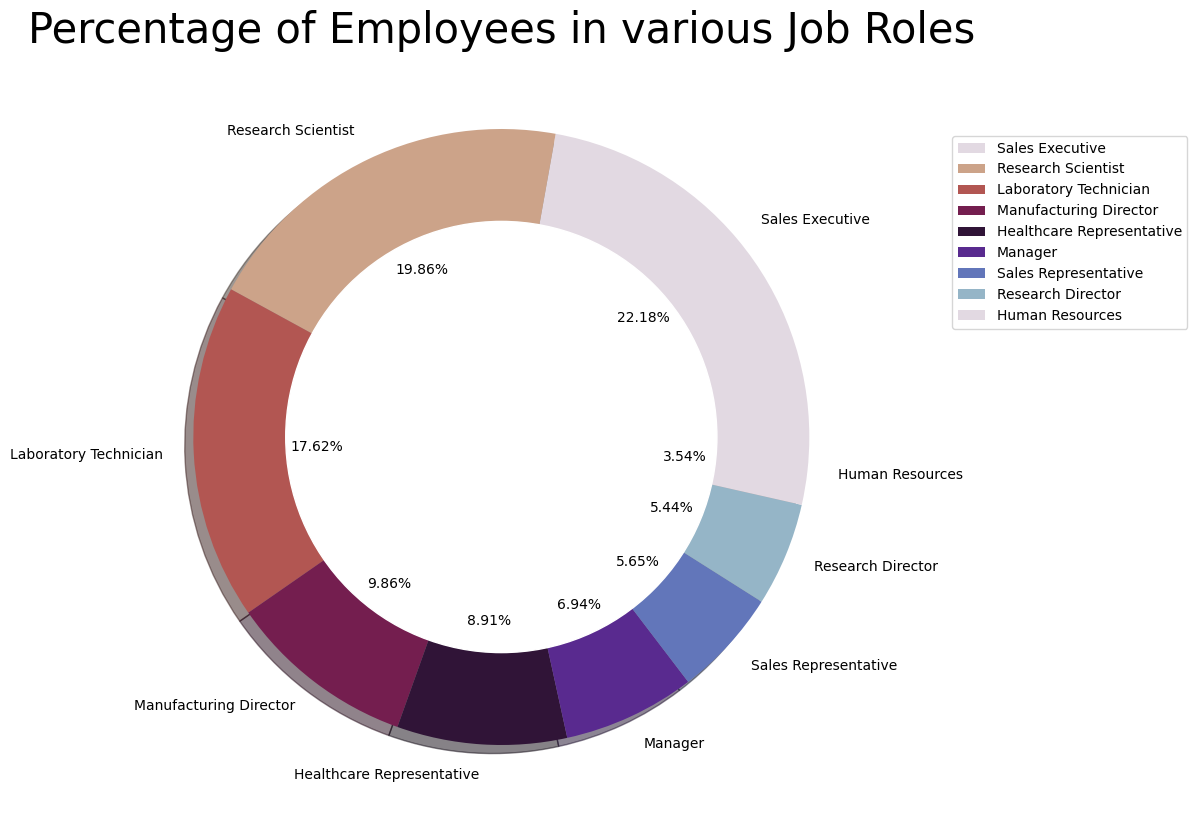

In [13]:
size = df['JobRole'].value_counts()
labels = df['JobRole'].unique()
colors = plt.cm.twilight_r(np.linspace(0,1,9))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Employees in various Job Roles', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

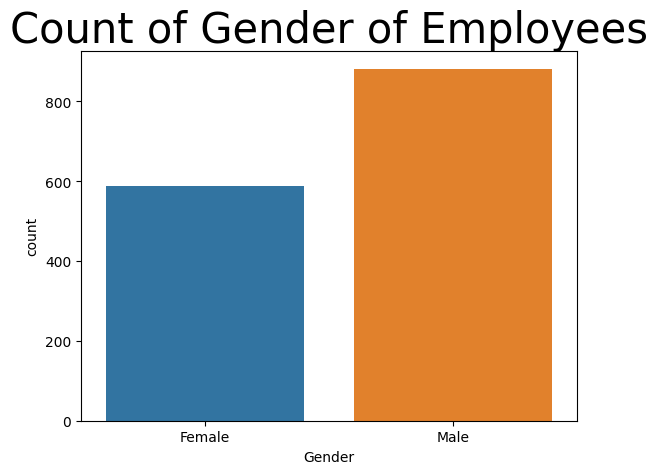

In [44]:
sns.countplot(x='Gender', data=df)
plt.title('Count of Gender of Employees', fontsize=30)
plt.xlabel('Gender')
plt.show()

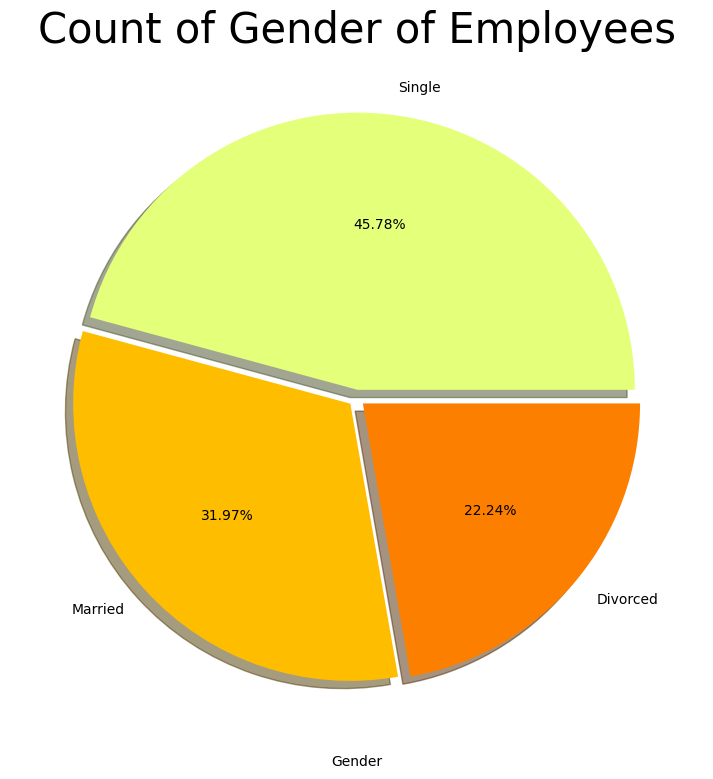

In [15]:
size=df['MaritalStatus'].value_counts()
labels=df['MaritalStatus'].unique()
colors=plt.cm.Wistia(np.linspace(0,1,3))
explode = [0.03, 0.03, 0.03]

plt.figure(figsize=(9,9))
plt.pie(size, colors=colors, labels=labels, explode=explode, autopct='%.2f%%', shadow=True)
plt.title('Count of Gender of Employees', fontsize=30)
plt.xlabel('Gender')
plt.show()

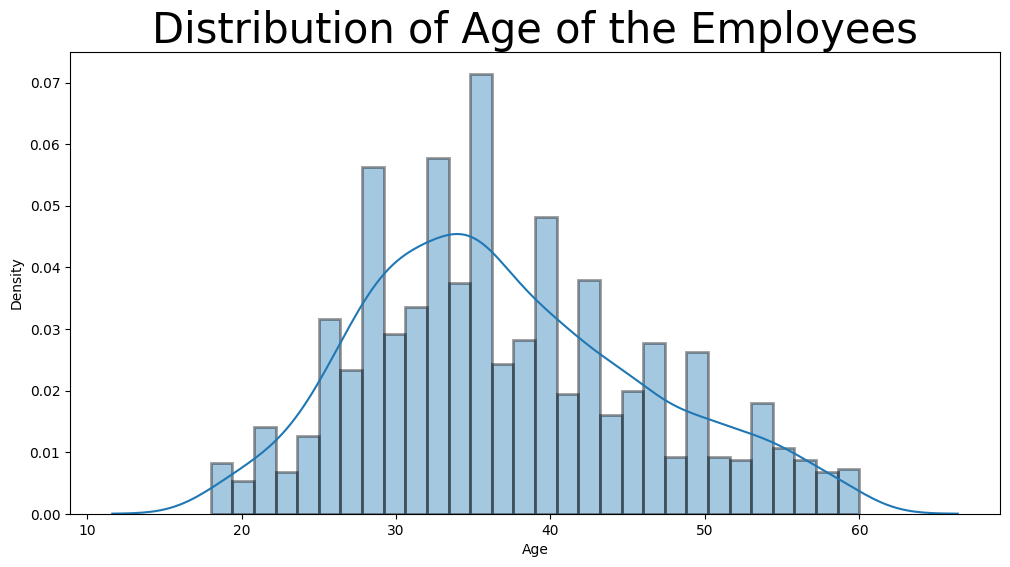

In [16]:
plt.figure(figsize=(12,6))
sns.distplot(df['Age'], bins=30, hist_kws=dict(edgecolor='black', linewidth=2))
plt.title('Distribution of Age of the Employees', fontsize=30)
plt.xlabel('Age')
plt.show()

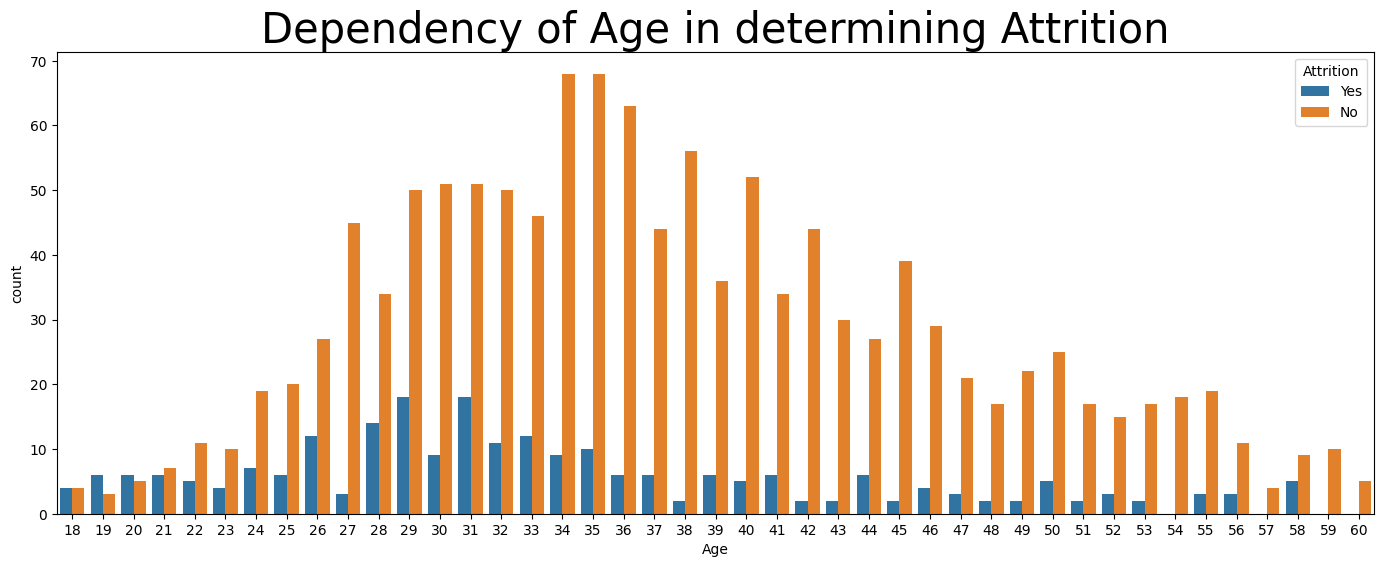

In [45]:
plt.figure(figsize=(17,6))
sns.countplot(x='Age', hue='Attrition', data=df)
plt.title('Dependency of Age in determining Attrition', fontsize=30)
plt.xlabel('Age')
plt.show()

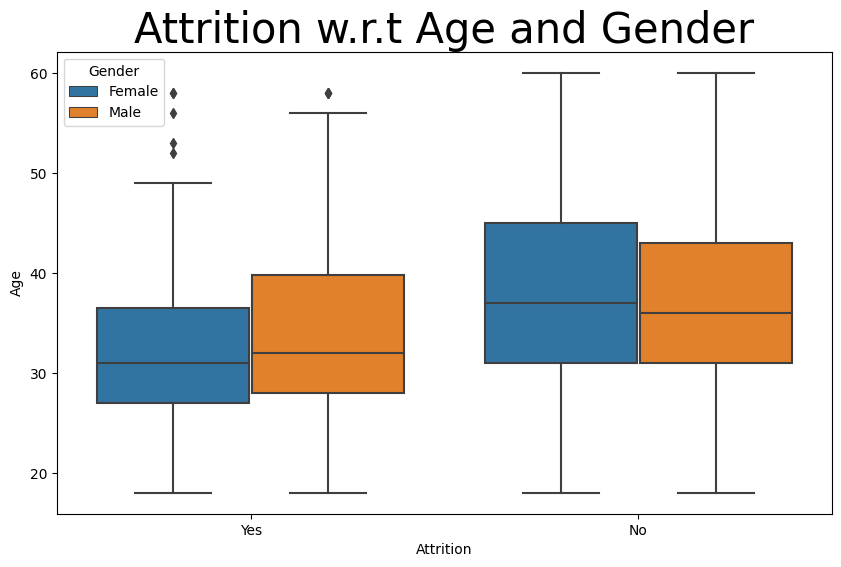

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Attrition', y='Age', hue='Gender', )
plt.title('Attrition w.r.t Age and Gender', fontsize=30)
plt.xlabel('Attrition')
plt.show()

<Figure size 1900x600 with 0 Axes>

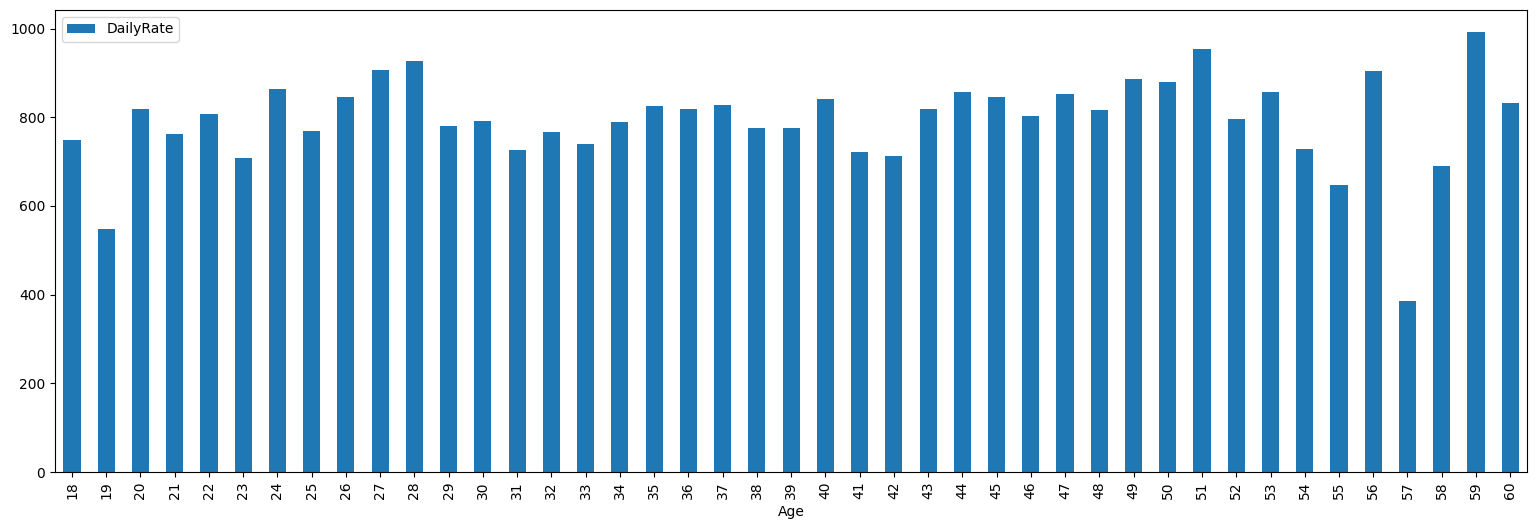

In [23]:
plt.figure(figsize=(19,6))
x = df[['Age', 'DailyRate']].groupby('Age').mean()
x = pd.DataFrame(x)
x.sort_values(by = 'Age').plot(kind='bar', figsize=(19,6));

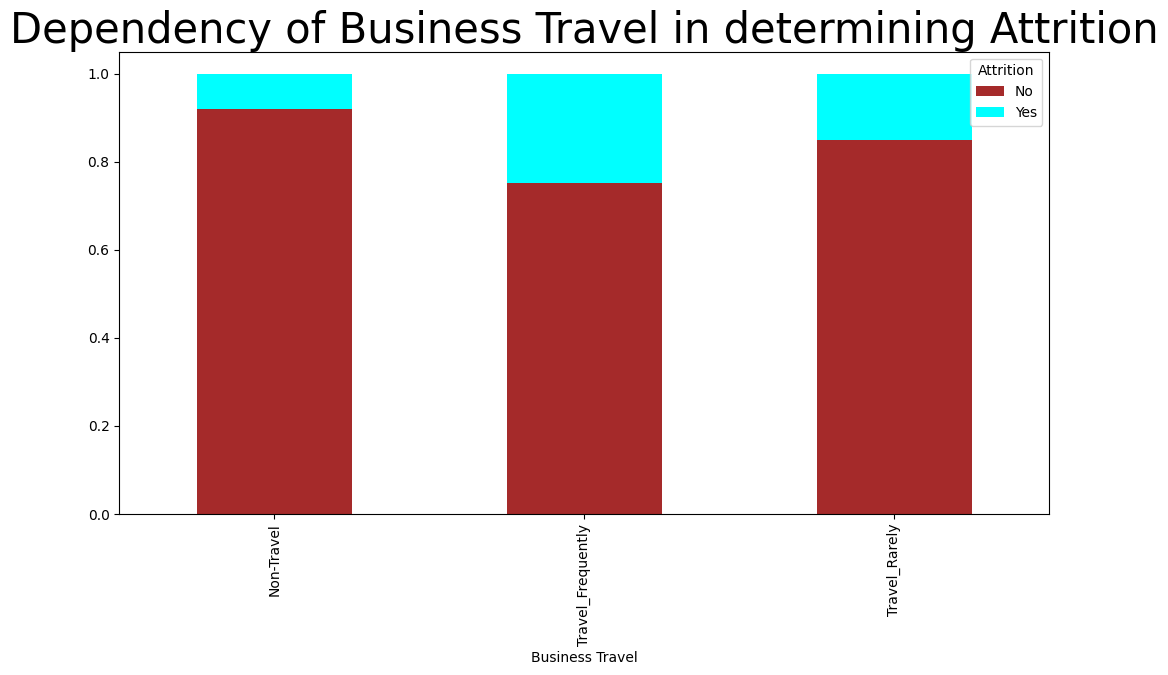

In [24]:
data=pd.crosstab(df['BusinessTravel'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'cyan'], 
                                                figsize=(12,6))
plt.title('Dependency of Business Travel in determining Attrition', fontsize=30)
plt.xlabel('Business Travel')
plt.show()

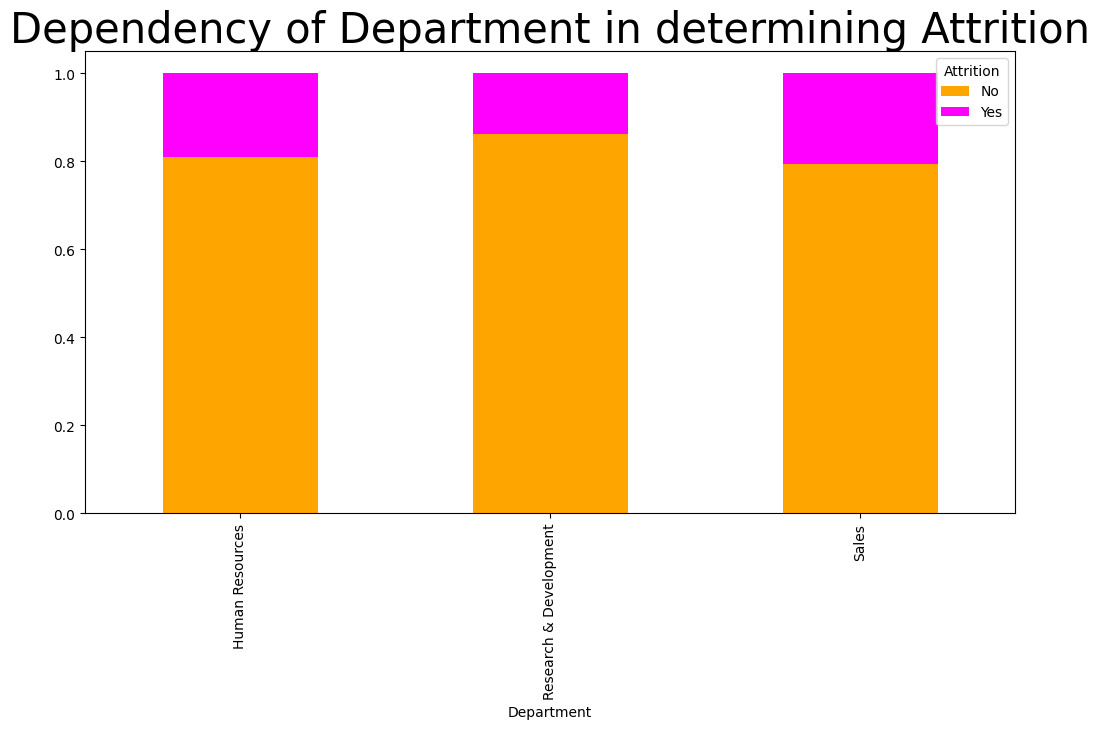

In [25]:
data=pd.crosstab(df['Department'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'magenta'], 
                                                figsize=(12,6))
plt.title('Dependency of Department in determining Attrition', fontsize=30)
plt.xlabel('Department')
plt.show()

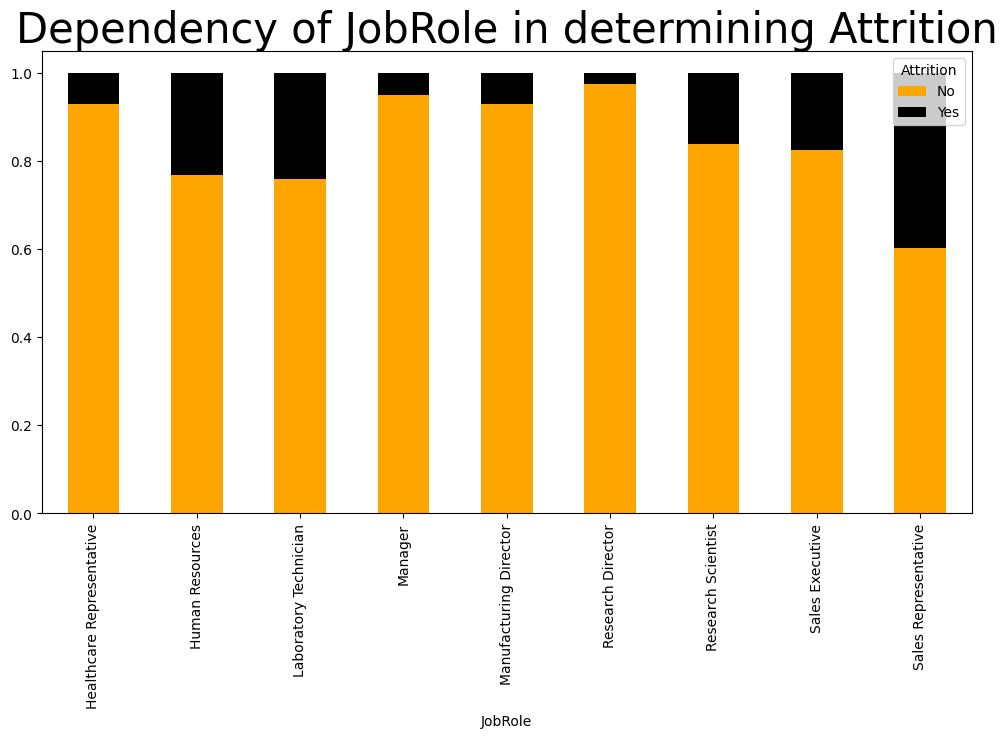

In [26]:
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
                                                figsize=(12,6))
plt.title('Dependency of JobRole in determining Attrition', fontsize=30)
plt.xlabel('JobRole')
plt.show()

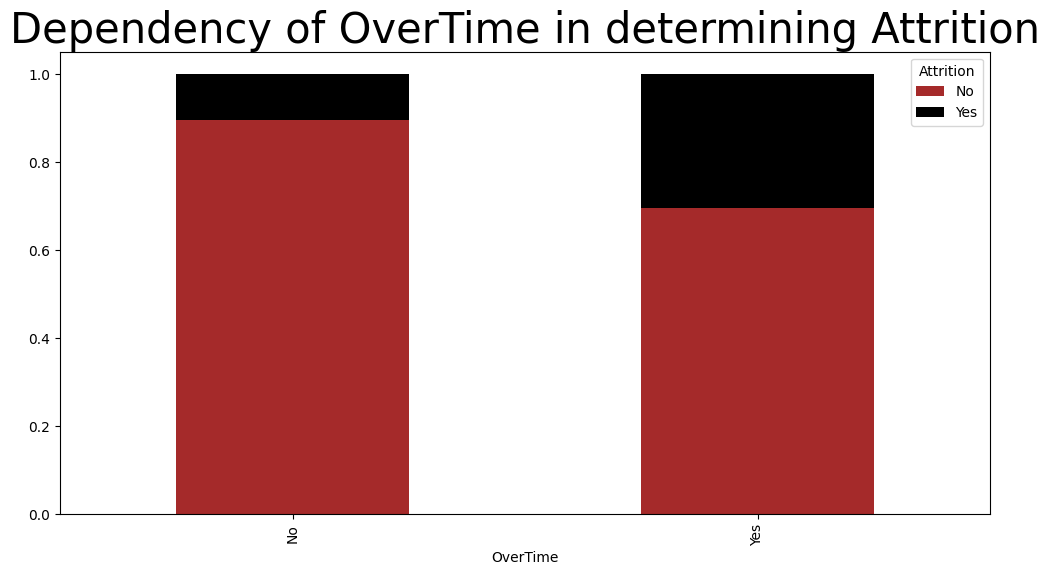

In [27]:
data=pd.crosstab(df['OverTime'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], 
                                                figsize=(12,6))
plt.title('Dependency of OverTime in determining Attrition', fontsize=30)
plt.xlabel('OverTime')
plt.show()

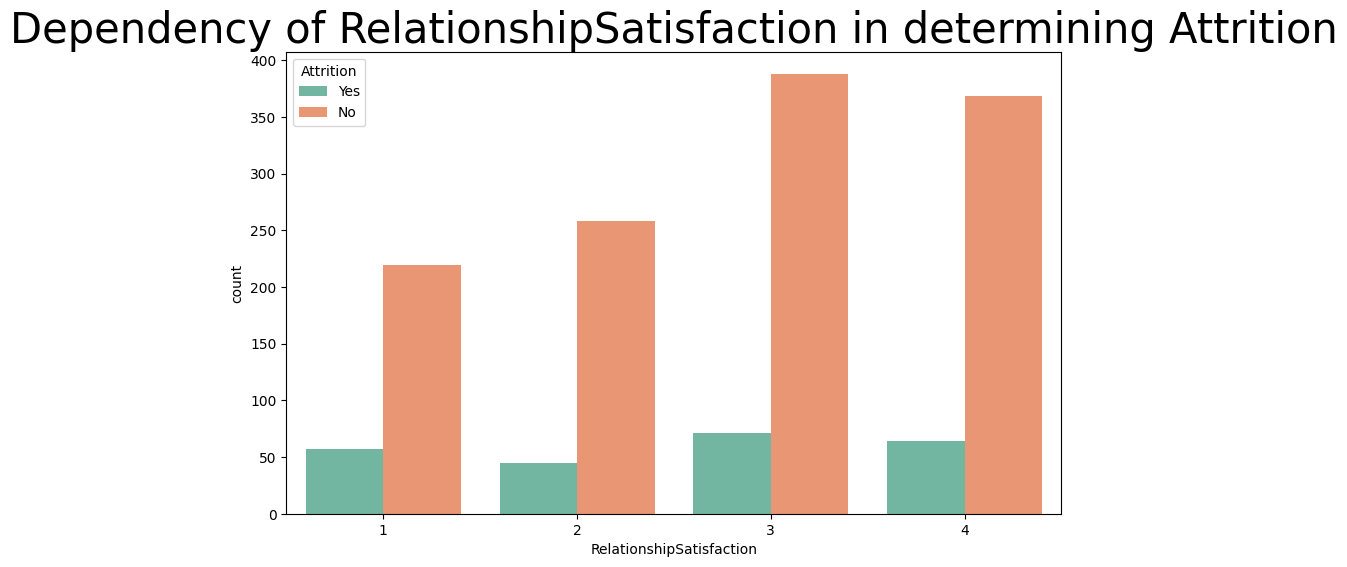

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df, palette='Set2')
plt.title('Dependency of RelationshipSatisfaction in determining Attrition', fontsize=30)
plt.xlabel('RelationshipSatisfaction')
plt.show()

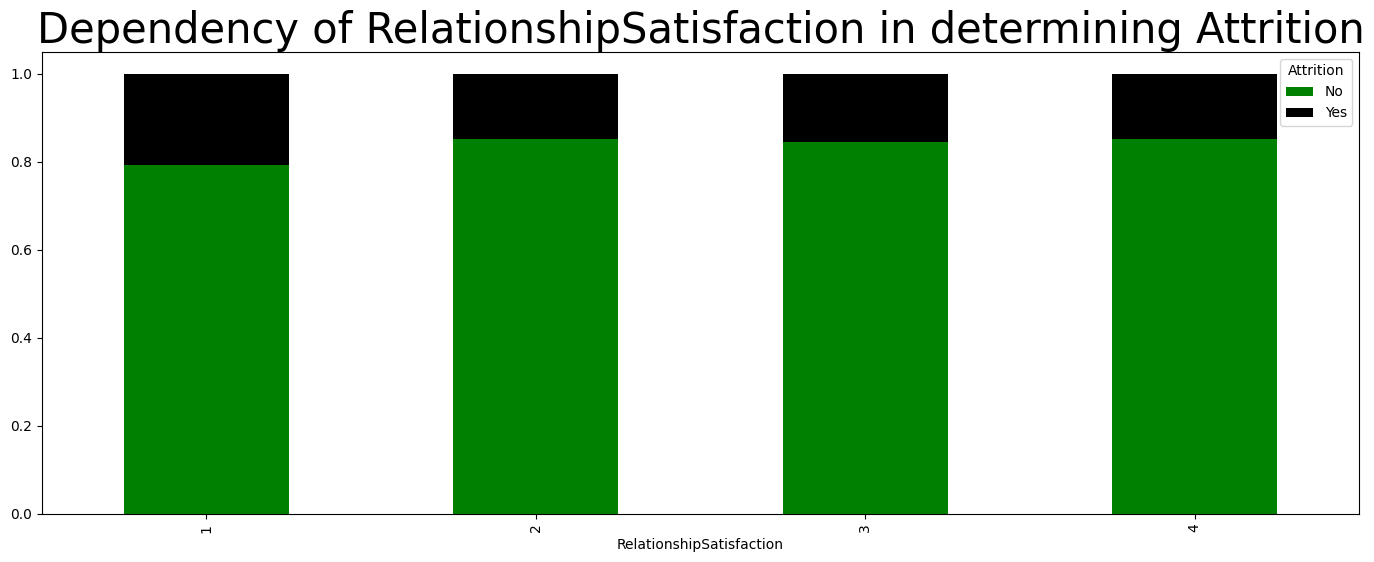

In [30]:
data=pd.crosstab(df['RelationshipSatisfaction'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['green', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of RelationshipSatisfaction in determining Attrition', fontsize=30)
plt.xlabel('RelationshipSatisfaction')
plt.show()

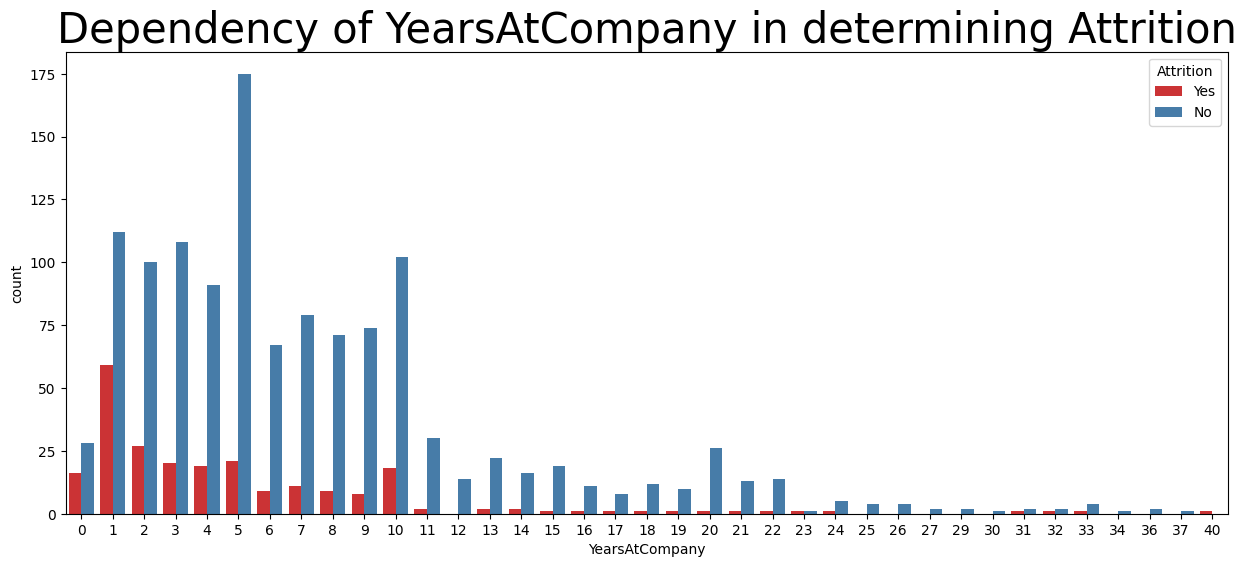

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df, palette='Set1')
plt.title('Dependency of YearsAtCompany in determining Attrition', fontsize=30)
plt.xlabel('YearsAtCompany')
plt.show()

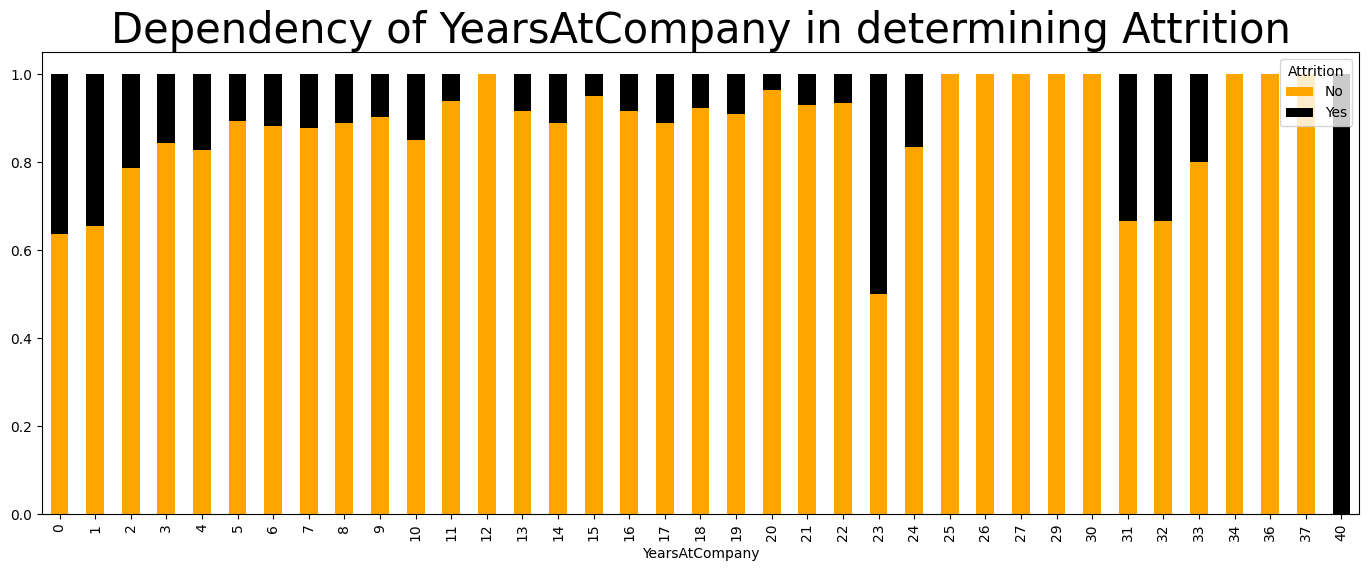

In [33]:
data=pd.crosstab(df['YearsAtCompany'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsAtCompany in determining Attrition', fontsize=30)
plt.xlabel('YearsAtCompany')
plt.show()

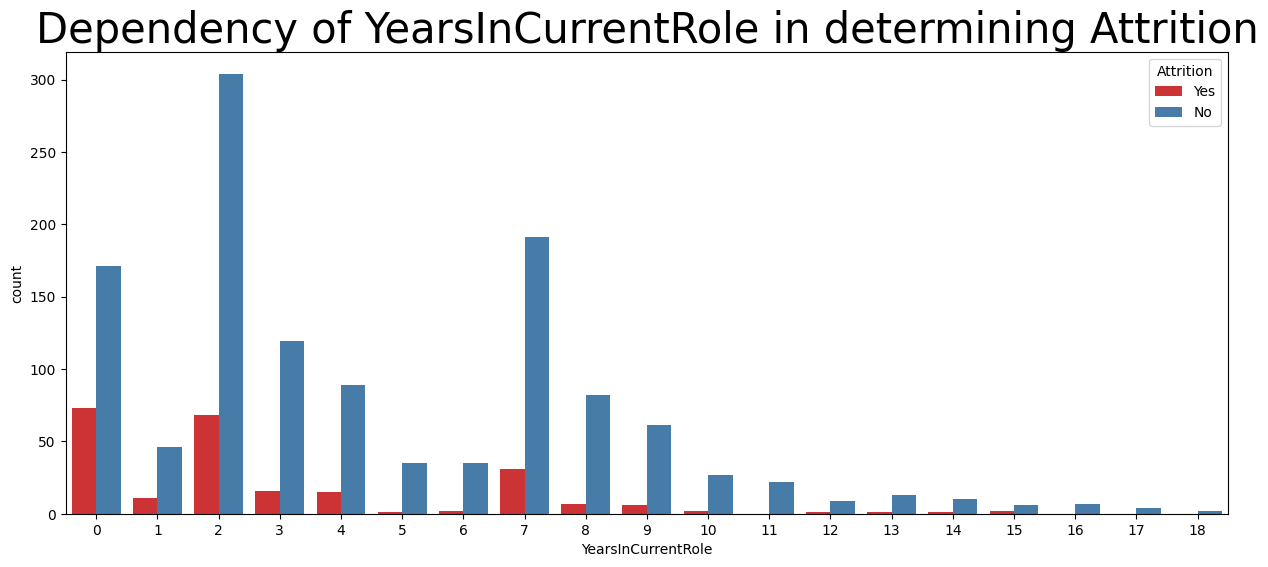

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=df, palette='Set1')
plt.title('Dependency of YearsInCurrentRole in determining Attrition', fontsize=30)
plt.xlabel('YearsInCurrentRole')
plt.show()

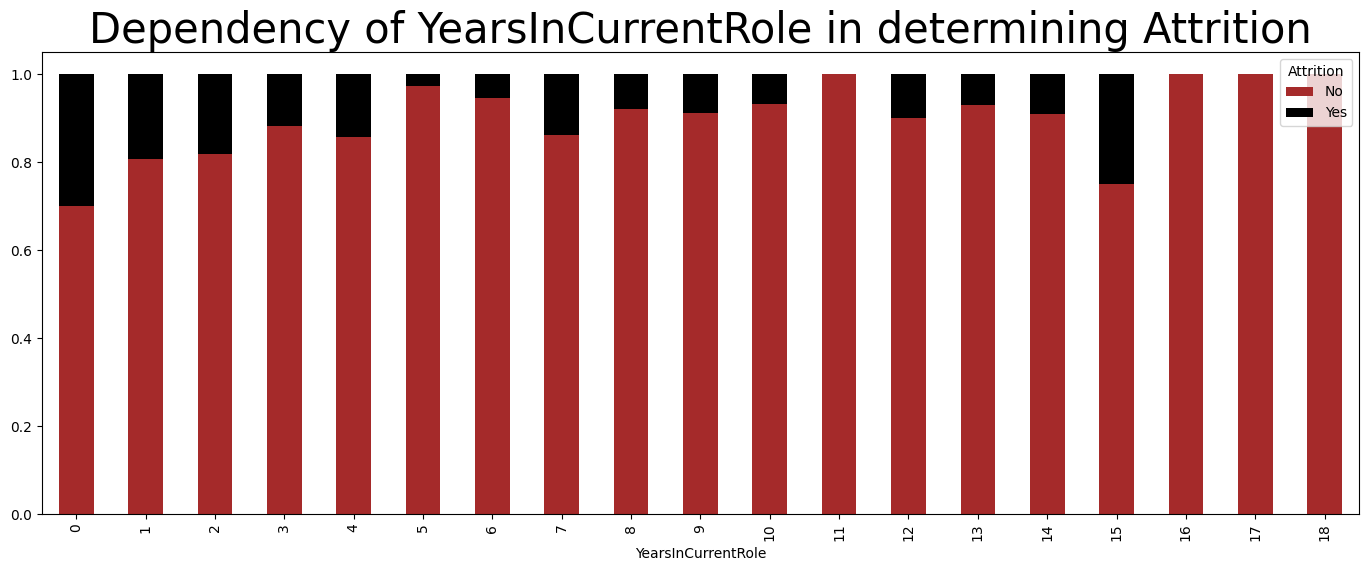

In [36]:
data=pd.crosstab(df['YearsInCurrentRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsInCurrentRole in determining Attrition', fontsize=30)
plt.xlabel('YearsInCurrentRole')
plt.show()

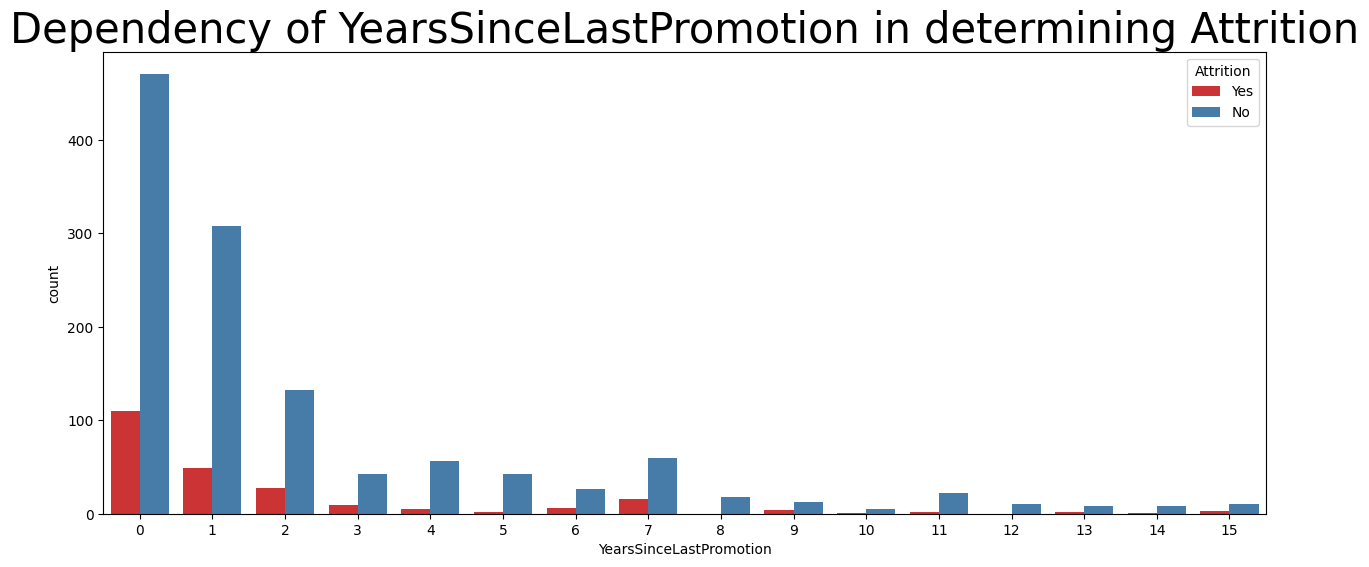

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df, palette='Set1')
plt.title('Dependency of YearsSinceLastPromotion in determining Attrition', fontsize=30)
plt.xlabel('YearsSinceLastPromotion')
plt.show()

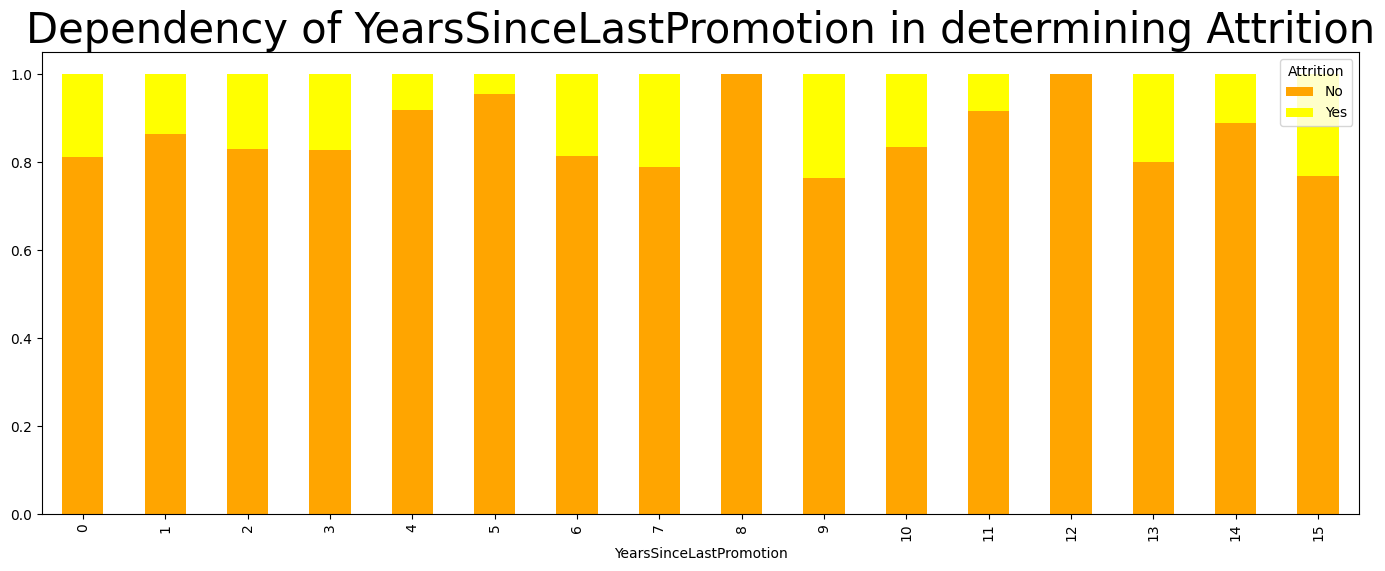

In [39]:
data=pd.crosstab(df['YearsSinceLastPromotion'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'yellow'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsSinceLastPromotion in determining Attrition', fontsize=30)
plt.xlabel('YearsSinceLastPromotion')
plt.show()

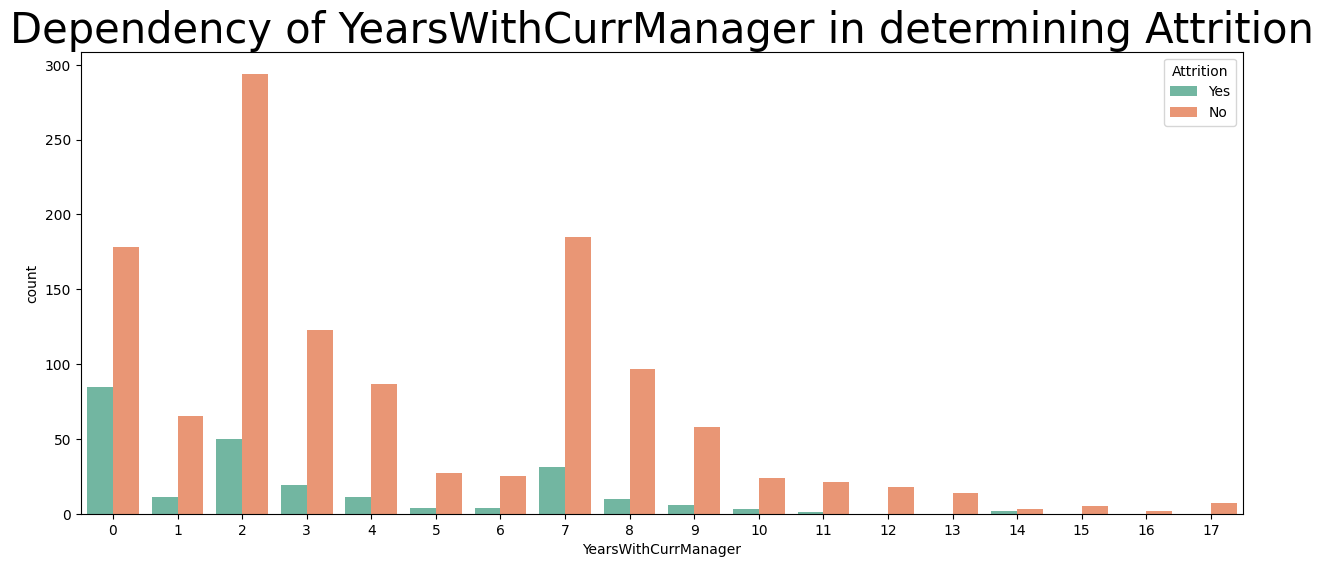

In [40]:
plt.figure(figsize=(15,6))
sns.countplot(x='YearsWithCurrManager', hue='Attrition', data=df, palette='Set2')
plt.title('Dependency of YearsWithCurrManager in determining Attrition', fontsize=30)
plt.xlabel('YearsWithCurrManager')
plt.show()

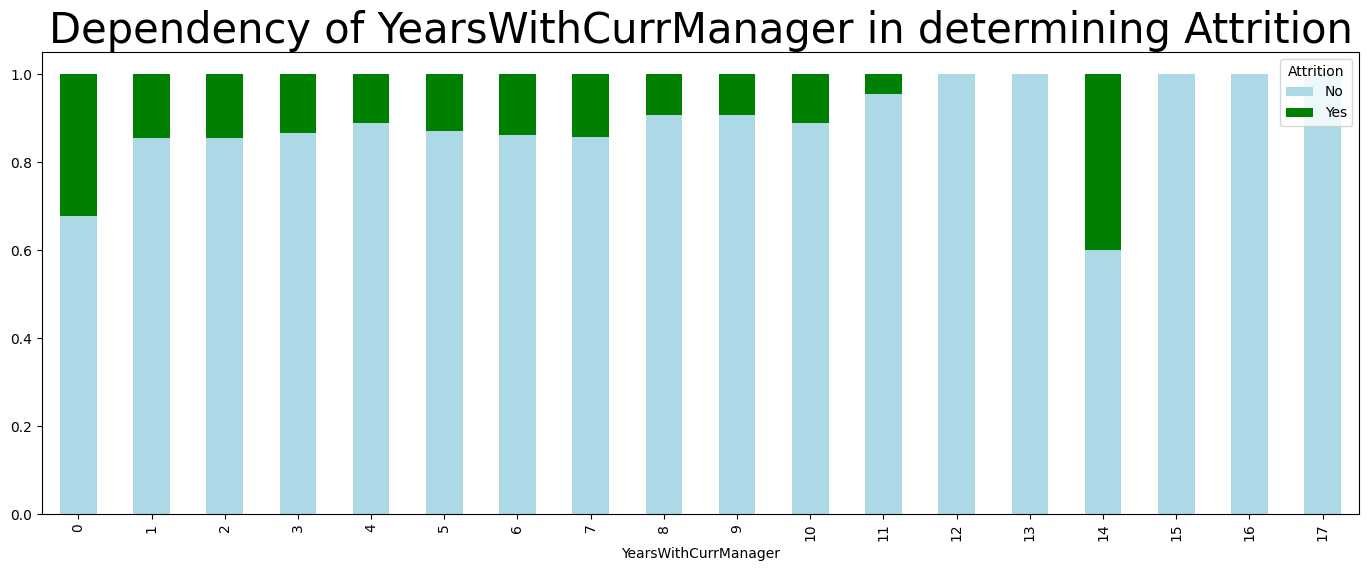

In [41]:
data=pd.crosstab(df['YearsWithCurrManager'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['lightblue', 'green'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsWithCurrManager in determining Attrition', fontsize=30)
plt.xlabel('YearsWithCurrManager')
plt.show()

# Analysis Conclusion :


### Top Reasons why Employees leave the Organization:

1. No Overtime This was a surpirse, employees who don't have overtime are most likely to leave the 
    organization. This could be that employees would like to have a higher amount of income or employees could 
    feel that they are underused.
    

2. Monthly Income: As expected, Income is a huge factor as why employees leave the organization in search for
    a better salary.
    

3. Age: This could also be expected, since people who are aiming to retire will leave the organization. 

Knowing the most likely reasons why employees leave the organization, can help the organization take action and reduce the level of Attrition inside the organization.